### Ridge Regression

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("dataset/tesla-stock-price.csv")
df.head()

,date,close,volume,open,high,low
0,15-10-2018,259.59,6189026,259.06,263.28,254.5367
1,12-10-2018,258.78,7189257,261.00,261.99,252.0100
2,11-10-2018,252.23,8128184,257.53,262.25,249.0300
3,10-10-2018,256.88,12781560,264.61,265.51,247.7700
4,09-10-2018,262.80,12037780,255.25,266.77,253.3000


In [31]:
df.dtypes

date       object
close     float64
volume      int64
open      float64
high      float64
low       float64
dtype: object

In [32]:
unique_dates = df['date'].unique()
date_to_int = {date: i for i, date in enumerate(unique_dates)}
df['date'] = df['date'].map(date_to_int)

In [33]:
df.dtypes

date        int64
close     float64
volume      int64
open      float64
high      float64
low       float64
dtype: object

In [34]:
X = df.drop(columns = 'close').values    #all the input columns
y = df['close'].values  #the output column

In [35]:
# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [36]:
def train_test_split(X, y, test_size=0.3):
    split_index = int((1 - test_size) * len(X))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train = add_bias(X_train)
X_test = add_bias(X_test)

In [38]:
class RidgeRegression:
    def __init__(self, lr=0.01, epochs=1000, l2_penalty=1.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_penalty = l2_penalty

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.W) + self.b
            error = y_pred - y

            dW = (1 / n_samples) * (np.dot(X.T, error) + self.l2_penalty * self.W)
            db = (1 / n_samples) * np.sum(error)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b

In [39]:
ridge = RidgeRegression(lr=0.01, epochs=1000, l2_penalty=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


In [40]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

In [41]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 27.26284398298729
MAE: 4.25086472010102
R2 Score: 0.938421823212345


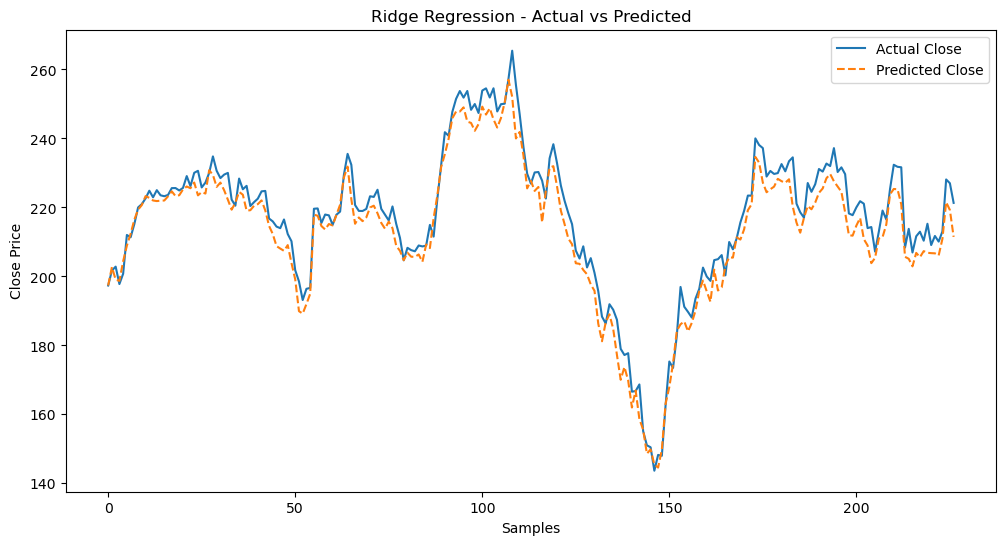

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close')
plt.plot(y_pred, label='Predicted Close', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Close Price')
plt.legend()
plt.title('Ridge Regression - Actual vs Predicted')
plt.show()